# Инструкция для запуска:
* Положить датасет из ibm в папку data/ibm/2/input и data/ibm/2/output
* Положить датасет ultra-i в папку data/ultra-i/input и data/ultra-i/output
* Подгрузить csv файлы 20240418-132345.csv и 20240418-132742.csv (запушил в гит) в папку output
* При запуске не из докера изменить переменную root_directory в след.ячейке
* Создать папку classification
* Проверить наличие файла metric_df в корне проекта

In [2]:
import sys
root_directory = '/app/'
sys.path.append(root_directory)

In [3]:
import pandas as pd
%matplotlib inline

OUTPUT_CSV_IBM = f'{root_directory}output/20240418-132345.csv'
FOLDER_IBM = f'{root_directory}data/ibm/2/'

OUTPUT_CSV_REAL = f'{root_directory}output/20240418-132742.csv'
FOLDER_REAL = f'{root_directory}data/ultra-i/'

In [4]:
import numpy as np
from PIL import Image
from pathlib import Path
from tqdm import tqdm

In [5]:
ibm_df  = pd.read_csv(OUTPUT_CSV_IBM)
ibm_df.image_name = ibm_df.image_name.apply(lambda x: root_directory + x)

real_df = pd.read_csv(OUTPUT_CSV_REAL)
real_df.image_name = real_df.image_name.apply(lambda x: root_directory + x)

In [6]:
real_df.head(1)

,image_name,rms,mse,brl,iou,slope,slope75,slope50,slope25,bl,norm,bji,dice
0,/app/data/ultra-i/input/0_C_d_0_10.png,0.048373,0.008532,[],0.816778,-89.999987,-89.999967,-89.999965,-89.999965,-245684770.0,0.164586,[],[]


In [7]:
ibm_df.head(1)

,image_name,rms,mse,brl,iou,slope,slope75,slope50,slope25,bl,norm,bji,dice
0,/app/data/ibm/2/input/10000_0.png,0.088115,0.020035,[],0.679028,-89.99999,-89.999974,-89.999953,-89.999953,-478678200.0,0.167674,[],[]


---
# ЯЧЕЙКИ НИЖЕ ЗАПУСТИТЬ ЕСЛИ НЕТ ФАЙЛА metric_df.csv (я его запушил в гит)

In [8]:
# data = ibm_df
# main_folder = FOLDER_IBM
# import os
# output_folder = 'output/'
# input_folder = 'input/'

# for data, main_folder in zip([ibm_df, real_df], [FOLDER_IBM, FOLDER_REAL]):
#     files = sorted(data.image_name.values)
#     c = 0
#     print(f'create template, {c=}')
#     for file in files:
#         mask = np.array(Image.open(main_folder + input_folder + Path(file).name))
#         opt_mask = np.array(Image.open(main_folder + output_folder + Path(file).name))
#         Image.fromarray(np.stack([mask, opt_mask, np.zeros_like(mask)], axis=-1)).save(f'{root_directory}classification/{Path(file).name}')
#         print(f'{c=}', end='\r')

In [9]:
# from metric import main as calc_metric
# print('calc_metric')
# r = calc_metric(f'{root_directory}classification/')

In [11]:
# metric_df = pd.DataFrame({'norm1': r[0], 'bl1': r[1], 'norm2': r[1], 'dices': r[2], 'ious': r[3], 'image_name': r[4]})
# metric_df.dices = metric_df.dices.apply(lambda x: x.item())
# metric_df.ious = metric_df.ious.apply(lambda x: x.item())
# metric_df.bl1 = metric_df.bl1.apply(lambda x: x.item())
# metric_df.bl2 = metric_df.bl2.apply(lambda x: x.item())

# ibm_values = ibm_df.image_name.values
# real_values = real_df.image_name.values

# metric_df.image_name = metric_df.image_name.apply(lambda x: (FOLDER_IBM if x in ibm_values else FOLDER_REAL) + 'input/' + Path(x).name)
# metric_df = metric_df.reset_index()
# metric_df.save(f'{root_directory}metric_df.csv', index=False, encoding='UTF-8')

# ЯЧЕЙКИ ВЫШЕ ЗАПУСТИТЬ ЕСЛИ НЕТ ФАЙЛА metric_df.csv (я его запушил в гит)
---

In [12]:
metric_df = pd.read_csv(f'{root_directory}metric_df.csv')
metric_df

,norm1,bl1,norm2,bl2,dices,ious,image_name
0,0.088328,-2069376.0,0.421627,-2047248.0,0.987183,0.660743,/app/data/ibm/2/input/3852_0.png
1,0.008414,-2935296.0,0.805249,-1459584.0,0.987549,0.667752,/app/data/ibm/2/input/1941_0.png
2,0.176630,-3130944.0,0.345092,-3172632.0,0.985107,0.667575,/app/data/ibm/2/input/10578_0.png
3,0.019608,-5378868.0,0.500000,-3476376.0,0.984985,0.712617,/app/data/ibm/2/input/223_0.png
4,0.000000,-148608.0,0.926136,-86064.0,0.996704,0.717277,/app/data/ibm/2/input/1544_0.png
...,...,...,...,...,...,...,...
4986,0.033445,-1689948.0,0.639222,-1166328.0,0.988647,0.640232,/app/data/ibm/2/input/1004_0.png
4987,0.141343,-1810068.0,0.209677,-2339880.0,0.989746,0.679389,/app/data/ibm/2/input/1147_0.png
4988,0.028708,-1595088.0,0.461022,-1138320.0,0.990784,0.659910,/app/data/ibm/2/input/246_0.png
4989,0.128165,-534672.0,2.932693,-98904.0,0.991699,0.514286,/app/data/ultra-i/input/3_O_d_1_5.png


In [13]:
new_data = pd.merge(ibm_df, metric_df, 'inner', on='image_name')
data_cleared = new_data[list(set(new_data.columns) - set(['image_name', 'brl']))]

mb_columns = ['bji', 'dice']
for col in mb_columns:
    if col in data_cleared.columns:
        data_cleared = data_cleared.drop(columns=[col])
        
train = data_cleared[['slope', 'slope75', 'slope50']]
train.describe()

data_cleared.corr()

real_data = pd.merge(real_df, metric_df, 'inner', on='image_name')
real_data_cleared = real_data[list(set(real_data.columns) - set(['image_name', 'brl']))]

mb_columns = ['bji', 'dice']
for col in mb_columns:
    if col in real_data_cleared.columns:
        real_data_cleared = real_data_cleared.drop(columns=[col])
        
test = real_data_cleared[['slope', 'slope75', 'slope50']]
test.describe()

,slope,slope75,slope50
count,607.000000,607.000000,607.000000
mean,-89.999987,-89.999964,-89.999956
std,0.000003,0.000007,0.000015
min,-89.999992,-89.999974,-89.999980
25%,-89.999991,-89.999969,-89.999968
50%,-89.999986,-89.999967,-89.999956
75%,-89.999985,-89.999960,-89.999950
max,-89.999980,-89.999942,-89.999916


# Обучение

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
stdscaler = StandardScaler()
preprocessed = stdscaler.fit_transform(train)
test_preprocessed = stdscaler.transform(test)

In [16]:
scatter_df = pd.DataFrame(preprocessed)
scatter_df.columns = ['slope', 'slope75', 'slope25']
# scatter_df.columns = ['slope', 'bl']

scatter_df.corr()

,slope,slope75,slope25
slope,1.000000,0.886119,0.672810
slope75,0.886119,1.000000,0.788324
slope25,0.672810,0.788324,1.000000


In [17]:
# !pip install kneed

In [18]:
from sklearn.metrics import pairwise_distances
import numpy as np

In [19]:
distances = pairwise_distances(preprocessed)
distances.shape

(4384, 4384)

In [20]:
n = 6

In [21]:
sorted_distances = np.sort(distances, axis=1)
sorted_nth_distanses = np.sort(sorted_distances[:, n - 1])

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

0.2627587328919285


<Figure size 500x500 with 0 Axes>

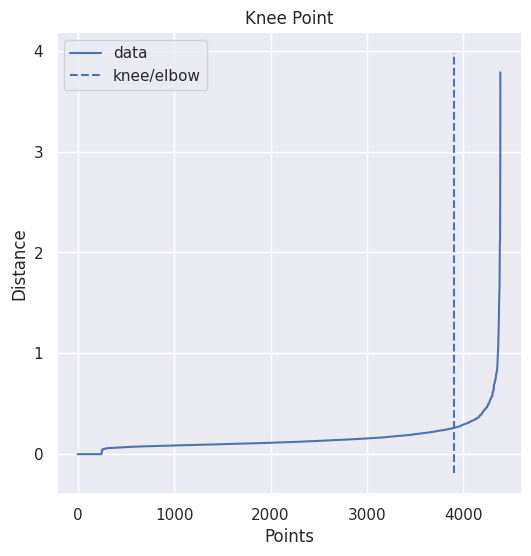

In [23]:
from kneed import KneeLocator
knee = KneeLocator(np.arange(len(sorted_distances)), 
                   sorted_nth_distanses, 
                   curve='convex', 
                   direction='increasing', 
                   interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
print(sorted_nth_distanses[knee.knee])

## DBSCAN

In [24]:
from sklearn.cluster import DBSCAN
import seaborn as sns

db = DBSCAN(eps=sorted_nth_distanses[knee.knee], min_samples=15).fit(preprocessed)
labels = db.labels_
labeled = np.hstack([new_data.image_name.values.reshape(-1, 1), labels.reshape(-1, 1)])
labels, np.unique(labels), [(labels==i).sum() for i in np.unique(labels)]

(array([ 0,  0, -1, ...,  0, -1, -1]),
 array([-1,  0,  1,  2,  3,  4]),
 [639, 3576, 39, 93, 17, 20])

# EM

In [25]:
from sklearn.mixture import GaussianMixture
em = GaussianMixture(n_components=2, random_state=0).fit_predict(preprocessed)
labels = em
labeled = np.hstack([new_data.image_name.values.reshape(-1, 1), labels.reshape(-1, 1)])
labels, np.unique(labels), [(labels==i).sum() for i in np.unique(labels)]

(array([0, 0, 1, ..., 0, 1, 1]), array([0, 1]), [3229, 1155])

# KMeans

In [26]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(preprocessed)
labels_test = kmeans.predict(test_preprocessed)
labeled = np.hstack([new_data.image_name.values.reshape(-1, 1), labels.reshape(-1, 1)])
labels, np.unique(labels), [(labels==i).sum() for i in np.unique(labels)]

/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(array([1, 1, 0, ..., 1, 2, 0], dtype=int32),
 array([0, 1, 2], dtype=int32),
 [691, 2230, 1463])

In [27]:
labeled_test = np.hstack([real_data.image_name.values.reshape(-1, 1), labels_test.reshape(-1, 1)])
np.unique(labels_test), [(labels_test==i).sum() for i in np.unique(labels_test)]

(array([0, 1, 2], dtype=int32), [160, 95, 352])

# Plot samples for different classes

In [28]:
from PIL import Image

In [29]:
assigned_names = {1: 'Загроможденные изображения',
                  2: 'Более-менее загроможденные изображения',
                  0: 'Незагроможденные изображения'}

In [30]:
def plot_samples_cluster(cluster, assigned_name=None):
    if assigned_name is None:
        assigned_name = f'Cluster: {str(cluster)}'
        
    whatisit = labeled[labeled[:, 1] == cluster]
    print(f'Количество экземпляров класса: {len(whatisit[:, 0])}')
    
    
    fig, axes = plt.subplots(5, 5, figsize=(12, 8))
    axes = axes.reshape(-1,)
    
    for i, ax in enumerate(axes):
        ax.imshow(np.array(Image.open(np.random.choice(whatisit[:, 0], 25, replace=False)[i])))
        
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
    fig.suptitle(assigned_name)

def plot_test_samples_cluster(cluster, assigned_name=None):
    if assigned_name is None:
        assigned_name = f'Cluster: {str(cluster)}'
        
    whatisit = labeled_test[labeled_test[:, 1] == cluster]
    print(f'Количество экземпляров класса: {len(whatisit[:, 0])}')
    
    
    fig, axes = plt.subplots(5, 5, figsize=(12, 8))
    axes = axes.reshape(-1,)
    
    for i, ax in enumerate(axes):
        ax.imshow(np.array(Image.open(np.random.choice(whatisit[:, 0], 25, replace=False)[i])))
        
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
    fig.suptitle(assigned_name)


    
def plot_samples_cluster_train_test(cluster, assigned_name=None):    
    plot_samples_cluster(cluster, labeled, assigned_name=assigned_name)
    plot_samples_cluster(cluster, labeled_test, assigned_name=assigned_name)

Количество экземпляров класса: 691


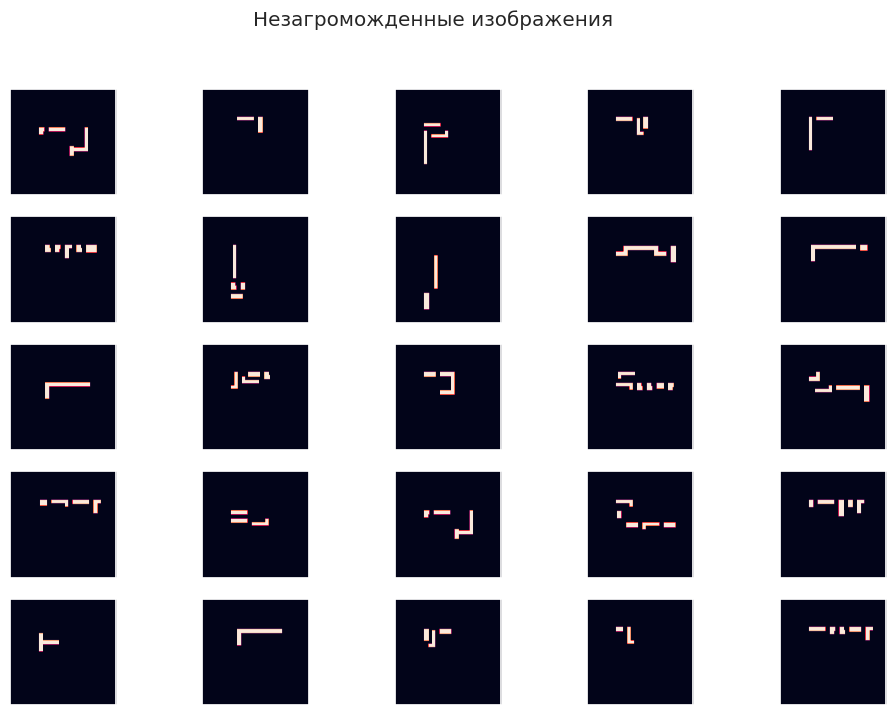

In [31]:
cluster = 0
plot_samples_cluster(cluster, assigned_names[cluster])

Количество экземпляров класса: 1463


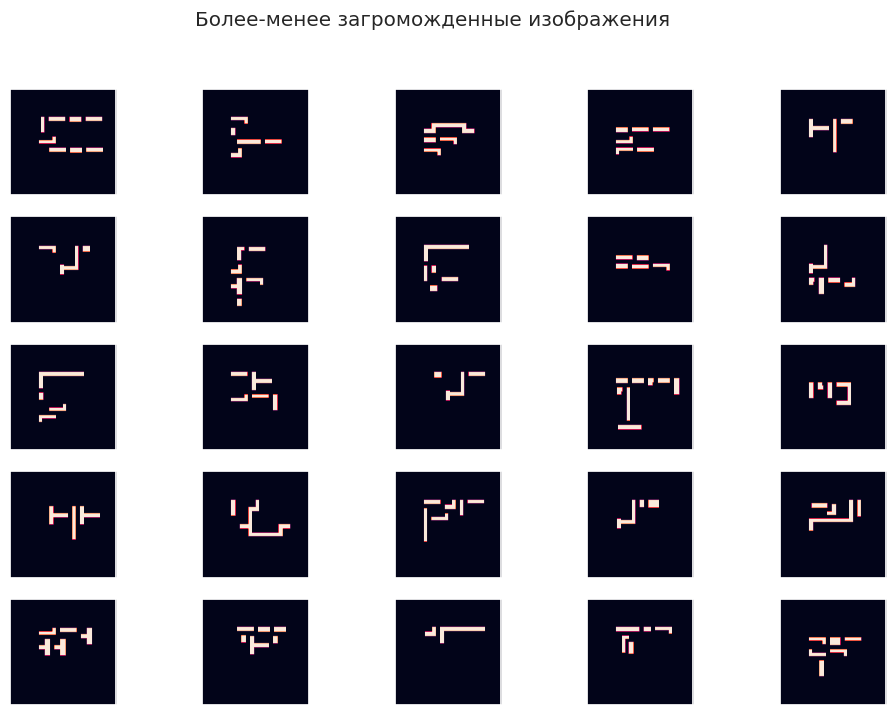

In [32]:
cluster = 2
plot_samples_cluster(cluster, assigned_names[cluster])

Количество экземпляров класса: 2230


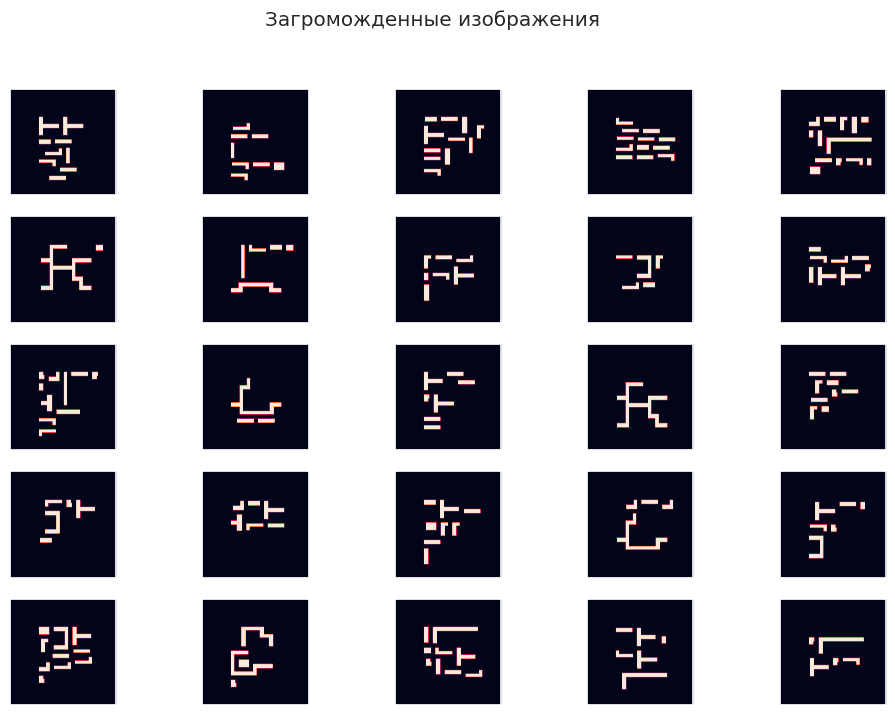

In [33]:
cluster = 1
plot_samples_cluster(cluster, assigned_names[cluster])

# TEST

Количество экземпляров класса: 160


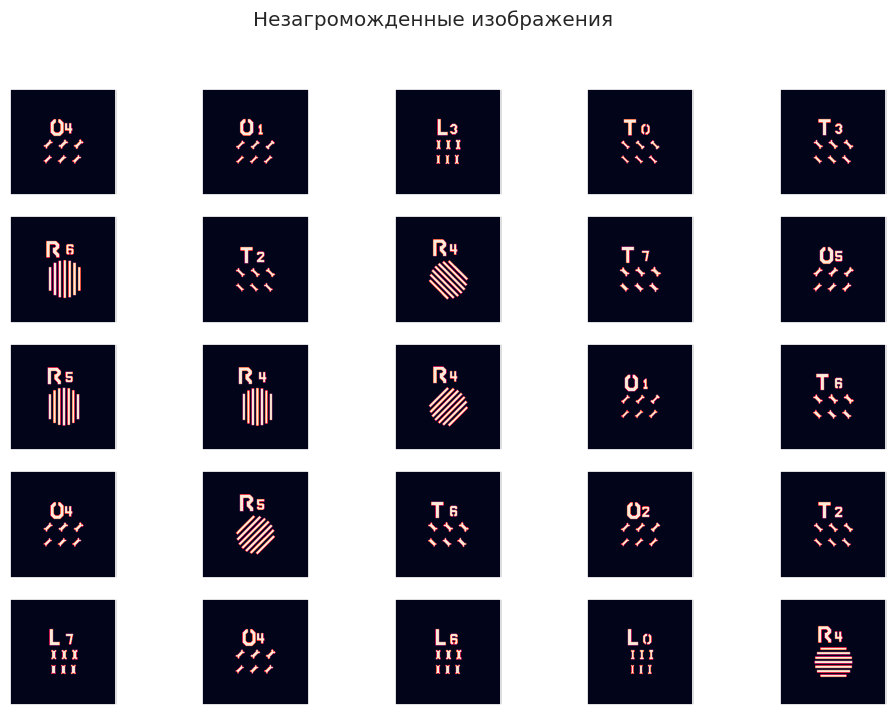

In [34]:
cluster = 0
plot_test_samples_cluster(cluster, assigned_names[cluster])

Количество экземпляров класса: 352


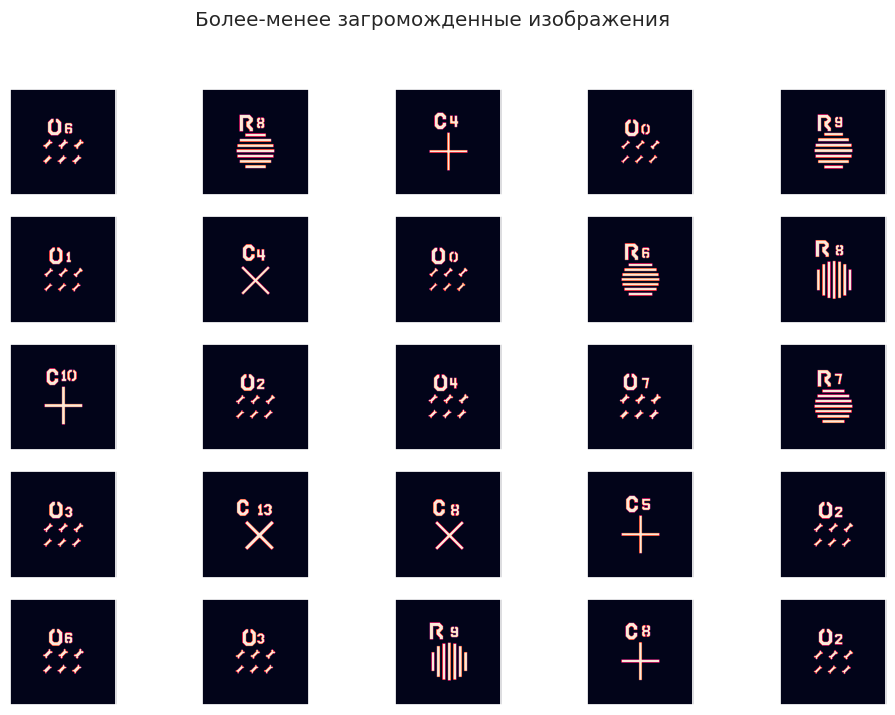

In [35]:
cluster = 2
plot_test_samples_cluster(cluster, assigned_names[cluster])

Количество экземпляров класса: 95


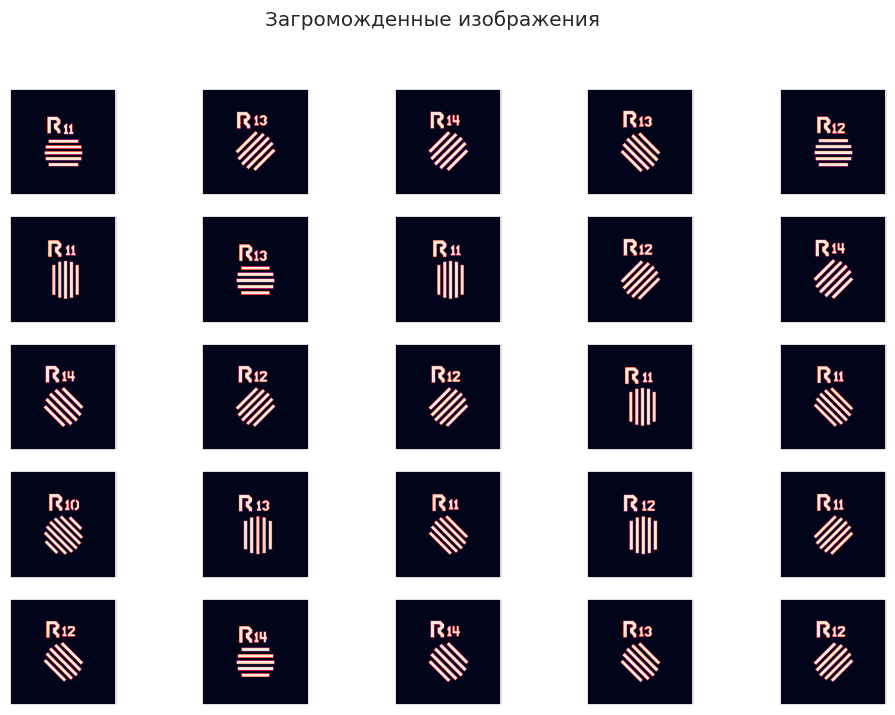

In [36]:
cluster = 1
plot_test_samples_cluster(cluster, assigned_names[cluster])

# Calculate metrics for different classes

In [37]:
data_cleared.head(1)

,rms,iou,ious,slope,norm1,mse,bl,slope25,slope75,norm2,dices,norm,bl1,slope50,bl2
0,0.088115,0.679028,0.740803,-89.99999,0.095376,0.020035,-478678200.0,-89.999953,-89.999974,0.188385,0.99054,0.167674,-2433072.0,-89.999953,-2867772.0


In [38]:
def plot_metric(data_cleared, real_data_cleared, labels, labels_test, name='mse'):
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    axes = axes.reshape(-1,)
    df = pd.DataFrame({name: data_cleared[name].values.reshape(-1, ), 'cluster': labels.reshape(-1, )})
    df_test = pd.DataFrame({name: real_data_cleared[name].values.reshape(-1, ), 'cluster': labels_test.reshape(-1, )})
    

    # верхний график
    sns.boxplot(df, x='cluster', y=name, ax = axes[0])
    axes[0].set_ylabel('Metric value')
    axes[0].set_title(name)
    sns.boxplot(df_test, x='cluster', y=name, ax = axes[1])
    axes[1].set_ylabel('Metric value')
    axes[1].set_title(name + ' test')

    # нижний график
    sns.histplot(data=df, ax=axes[2], x=name, hue='cluster')
    sns.histplot(data=df_test, ax=axes[3], x=name, hue='cluster')
    
    fig.suptitle(name)

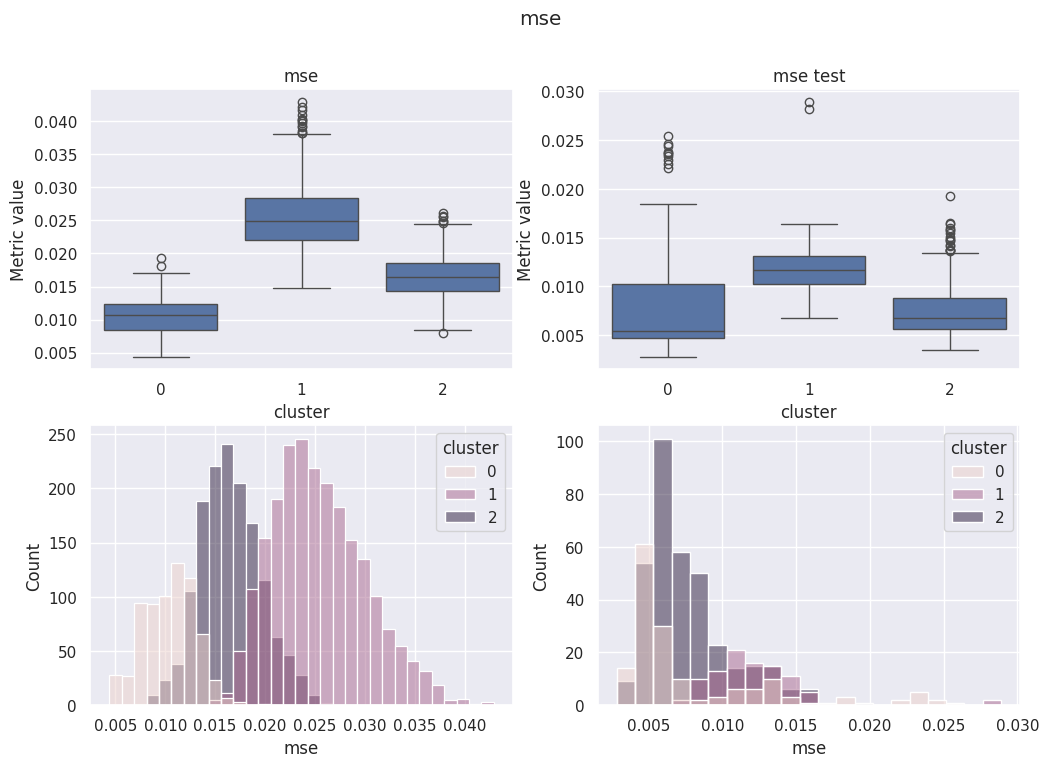

In [39]:
plot_metric(data_cleared, real_data_cleared, labels, labels_test, 'mse')

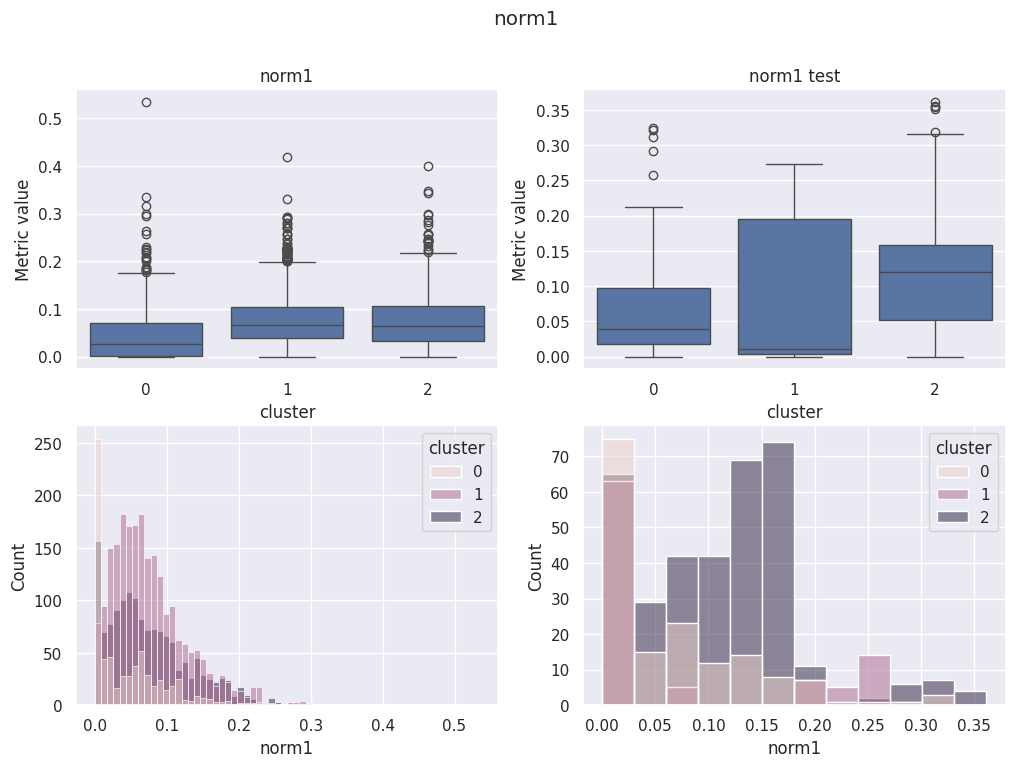

In [40]:
plot_metric(data_cleared, real_data_cleared, labels, labels_test, 'norm1')

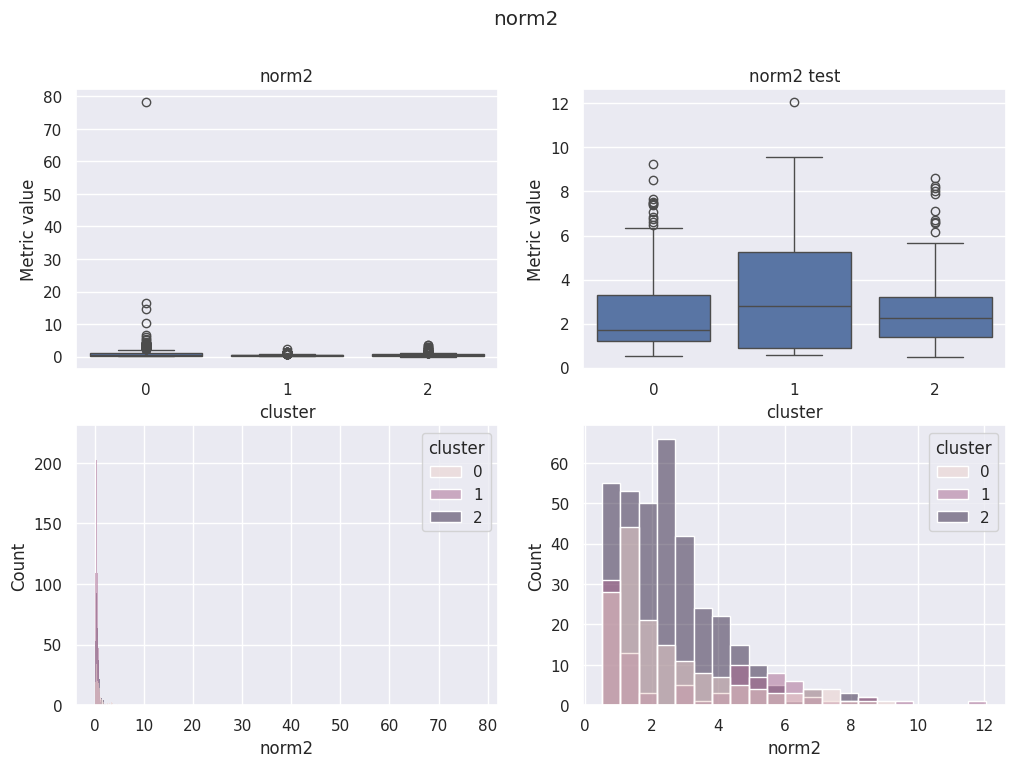

In [41]:
plot_metric(data_cleared, real_data_cleared, labels, labels_test, 'norm2')

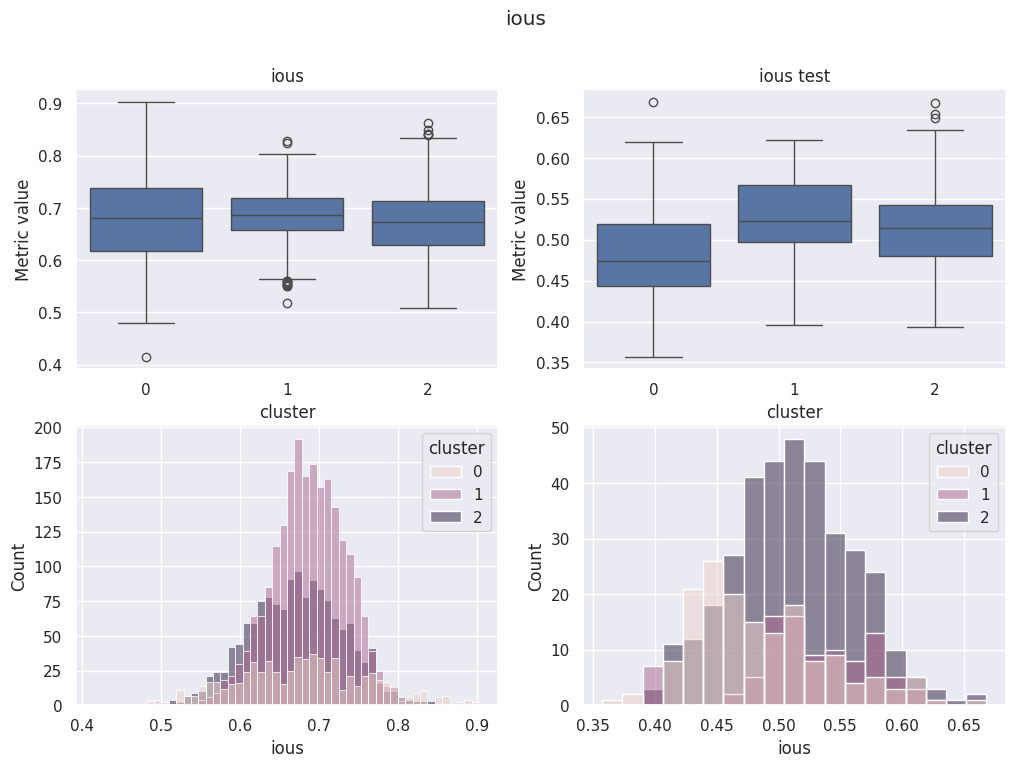

In [42]:
plot_metric(data_cleared, real_data_cleared, labels, labels_test, 'ious')

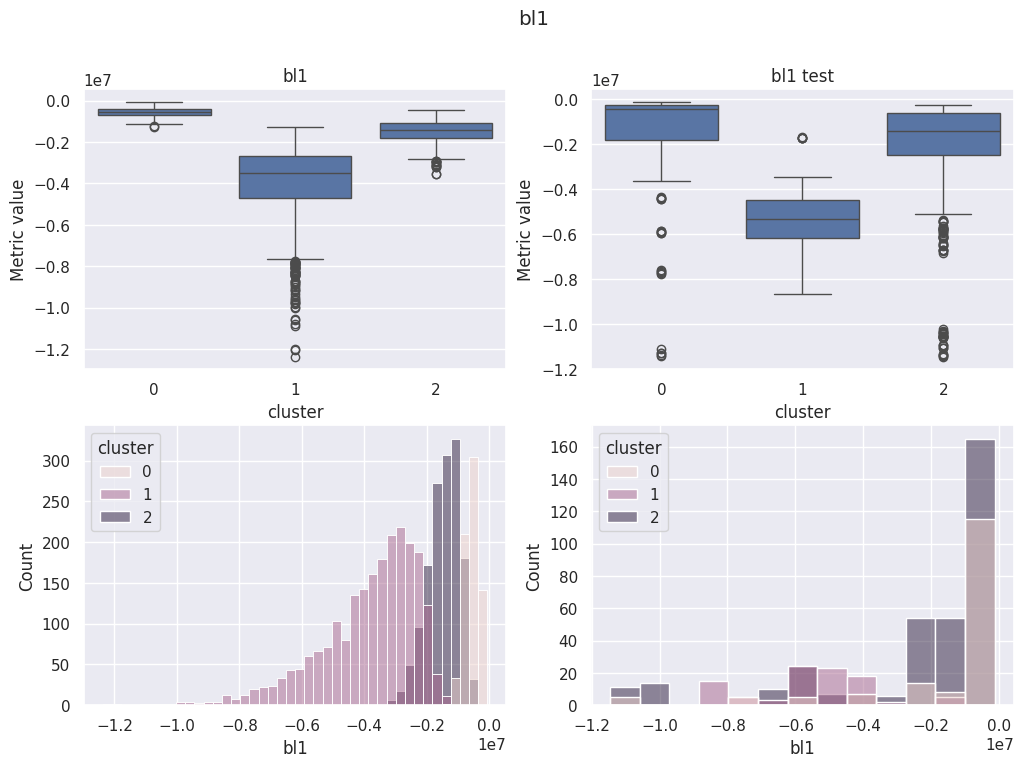

In [43]:
plot_metric(data_cleared, real_data_cleared, labels, labels_test, 'bl1')

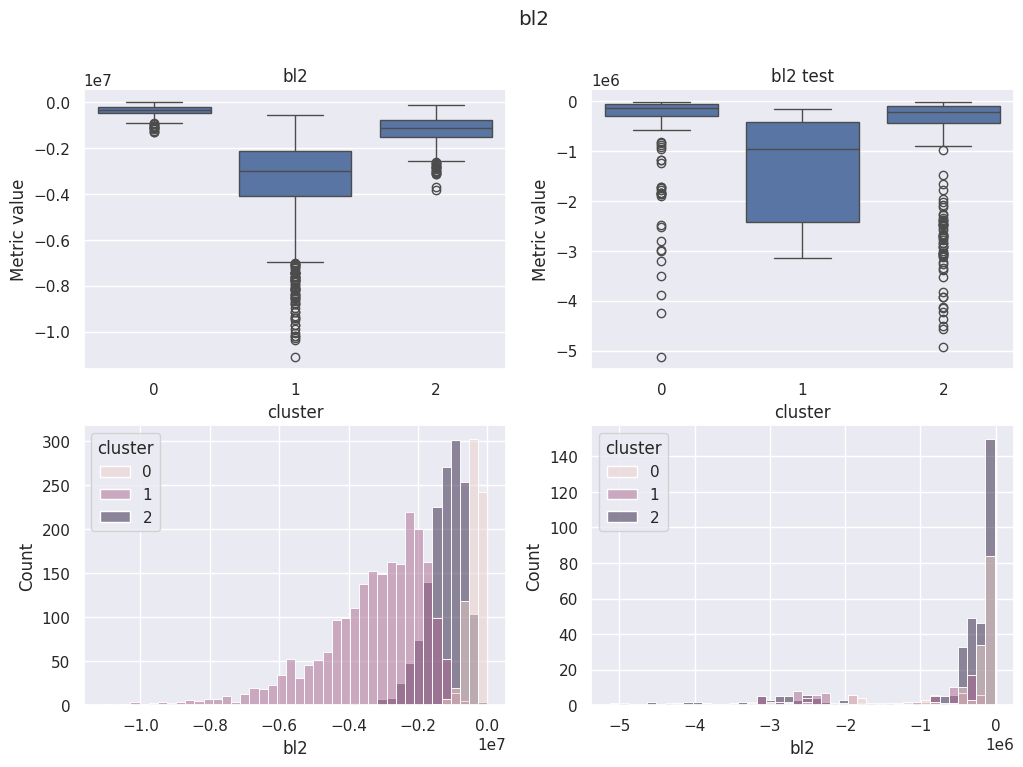

In [44]:
plot_metric(data_cleared, real_data_cleared, labels, labels_test, 'bl2')

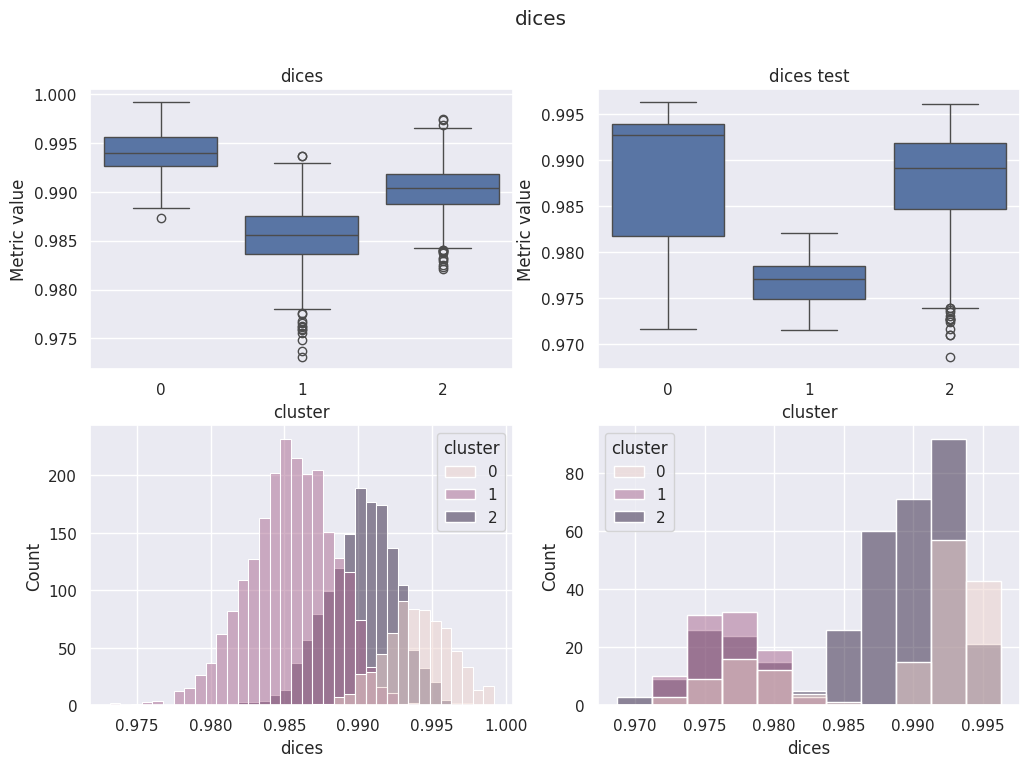

In [45]:
plot_metric(data_cleared, real_data_cleared, labels, labels_test, 'dices')

### Вывод:
1. Видно, что метрики **norm1** и **iou** более-менее хорошо адаптирована под каждые кластеры и меньше зависят от загроможденности изображения, чем остальные расмотренные метрики
    * Метрика **iou** при увеличении загроможденности увеличивает свой разброс
    * Метрика **norm1** имеет почти фиксированный разброс и почти фиксированное среднее значение
2. Метрика **norm1** является **наиболее подходящей для задачи**

# Visualise clusters

In [46]:
# !pip install umap-learn

In [47]:
# !pip install plotly

In [48]:
import umap
from sklearn.metrics.pairwise import cosine_similarity
import random
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import euclidean_distances
import plotly.express as px

2024-04-19 15:38:05.136284: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-19 15:38:05.152758: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-19 15:38:05.152798: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-19 15:38:05.153557: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-19 15:38:05.156919: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-19 15:38:05.157540: I tensorflow/core/platform/cpu_feature_guard.cc:1

## UMAP

In [52]:
sns.set(style='darkgrid')
# !pip install nbformat>=4.2.0

**В ячейке ниже можно кликать на точки на графике для вывода картинки**

In [60]:
import plotly.graph_objs as go
from IPython.display import display, Image as dImage, clear_output
from plotly.callbacks import Points

points = Points()


umapper =  umap.UMAP(random_state=42)
X_UMAP = umapper.fit_transform(preprocessed)

x, y = X_UMAP[:, 0], X_UMAP[:, 1]
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels, 'image_name': new_data.image_name.values}) 
df_test = pd.DataFrame({'x': x_test, 'y':y_test, 'label':labels_test, 'image_name': real_data.image_name.values}) 
df_test['is_test'] = df_test.label.apply(lambda x: 'test ' + str(x))
df['is_test'] = df.label.apply(lambda x: 'train ' + str(x))
df_test['color'] = df_test.label.apply(lambda x: x+0.5)
df['color'] = df.label.apply(lambda x: x)
res_df = pd.concat([df, df_test]).reset_index(drop=True)


fig = px.scatter(
    res_df, x='x', y='y', hover_data=['image_name'], width=1200, height=800, hover_name='is_test', color='color', title="Clustering", color_continuous_scale=px.colors.diverging.Portland
)

prev = None

def filter_country(trace, points, state):
    global fig
    clear_output(False)
    display(fig)
    prev = display(dImage(filename=res_df.iloc[points.point_inds]["image_name"].values[0]))


fig = go.FigureWidget(fig.data, fig.layout)

fig.data[0].on_click(filter_country)

display(fig)
dh = display(display_id=True)

/usr/local/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



FigureWidget({
    'data': [{'customdata': array([['/app/data/ibm/2/input/10000_0.png'],
                                   ['/app/data/ibm/2/input/10001_0.png'],
                                   ['/app/data/ibm/2/input/10003_0.png'],
                                   ...,
                                   ['/app/data/ultra-i/input/4_T_d_7_5.png'],
                                   ['/app/data/ultra-i/input/4_T_d_7_6.png'],
                                   ['/app/data/ultra-i/input/4_T_d_7_7.png']], dtype=object),
              'hovertemplate': ('<b>%{hovertext}</b><br><br>x=%' ... '%{marker.color}<extra></extra>'),
              'hovertext': array(['train 1', 'train 1', 'train 0', ..., 'test 0', 'test 0', 'test 0'],
                                 dtype=object),
              'legendgroup': '',
              'marker': {'color': array([1. , 1. , 0. , ..., 0.5, 0.5, 0.5]),
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
          

## PCA 2D

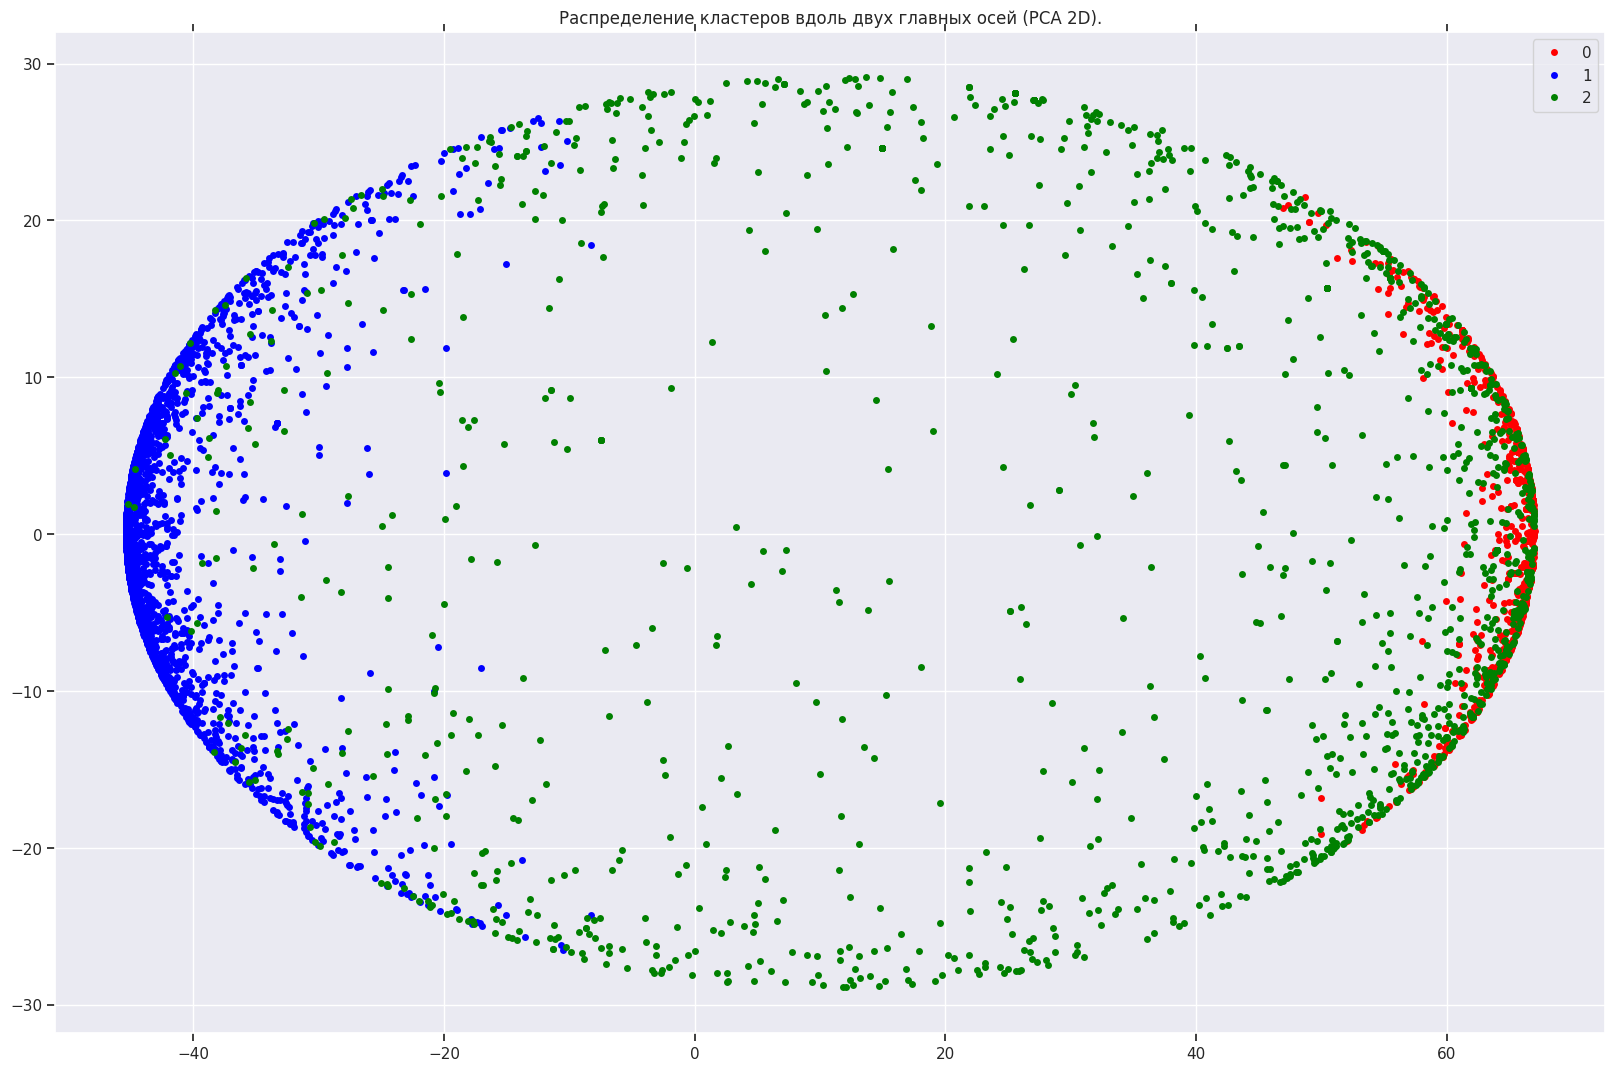

In [55]:
from sklearn.decomposition import PCA
pca = PCA(2)

dist = 1 - cosine_similarity(preprocessed)
pca.fit(dist)
X_PCA = pca.transform(dist)
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5:'purple'
         }

names = {0: 'class 0', 
         1: 'class -1', 
         2: 'class 2', 
         3: 'class 3', 
         4: 'class 4',
         5: 'class 5'
        }
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', label=name, color=colors[name], ms=5, mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Распределение кластеров вдоль двух главных осей (PCA 2D).")
plt.show()

## PCA 1D

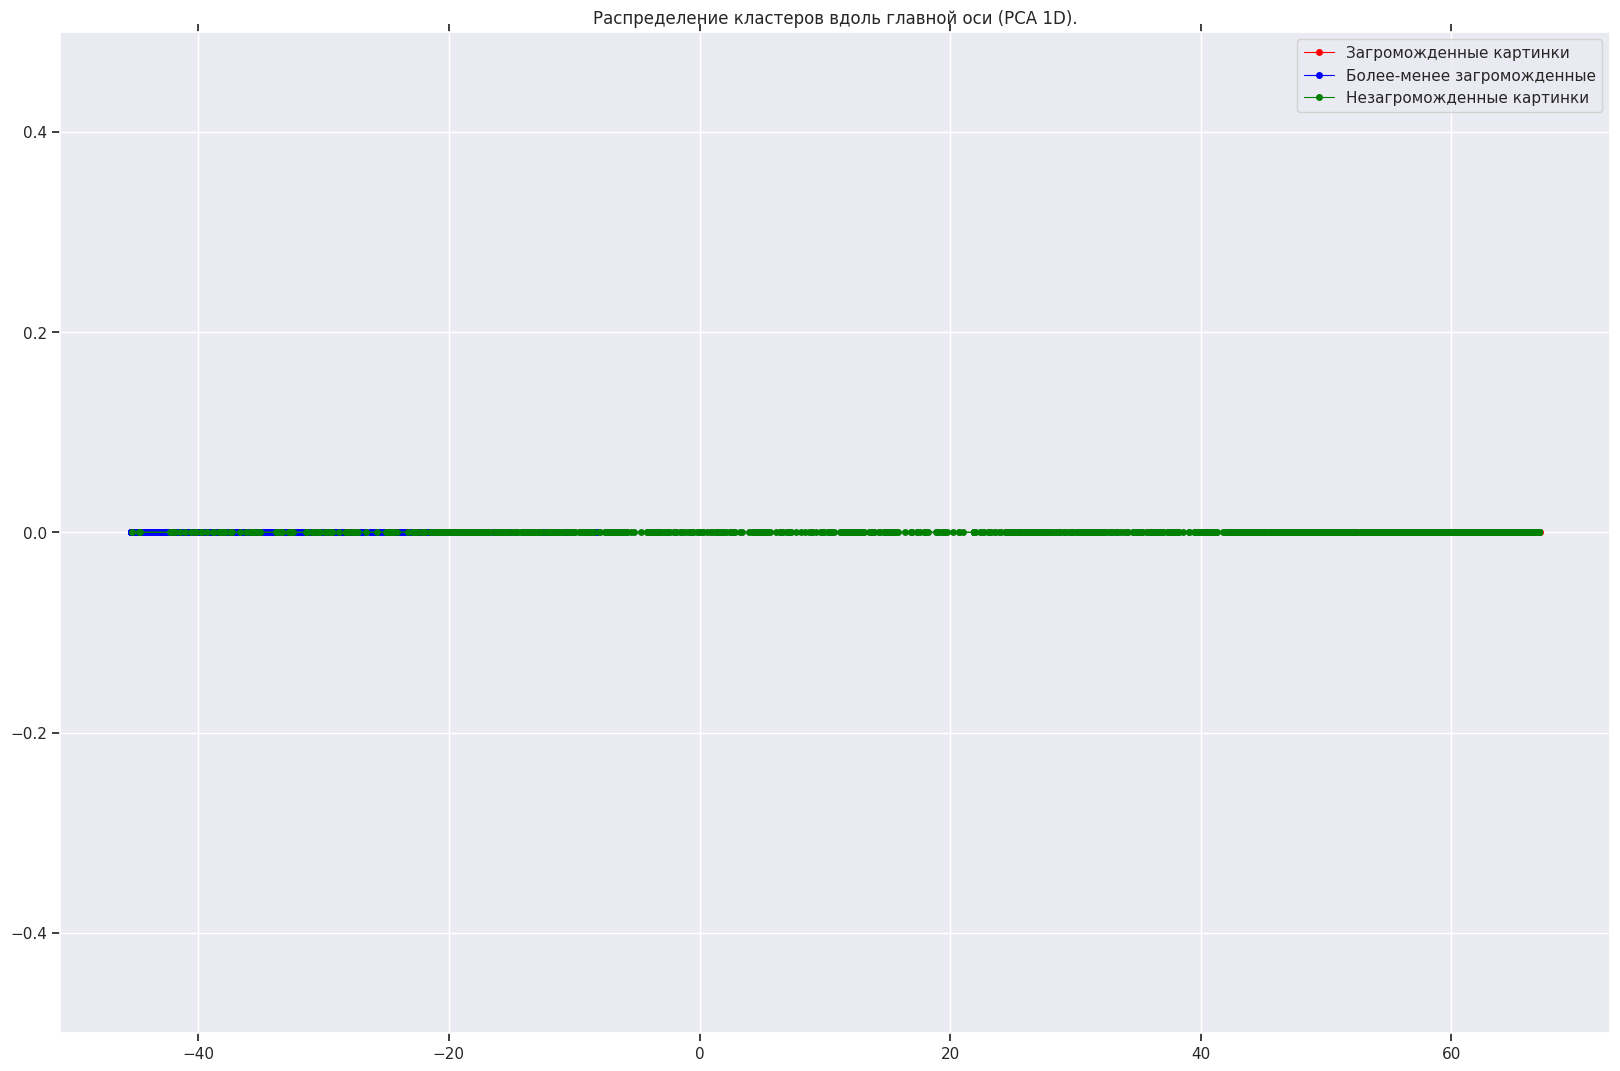

In [56]:
from sklearn.decomposition import PCA
pca = PCA(1)

dist = 1 - cosine_similarity(preprocessed)
pca.fit(dist)
X_PCA = pca.transform(dist)
x = X_PCA[:, 0]
y = 0

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5:'purple'
         }

names = {0: 'Загроможденные картинки', 
         1: 'Более-менее загроможденные', 
         2: 'Незагроможденные картинки', 
        }
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 


box_data = []
for name, group in groups:
    ax.plot(group.x.values, np.zeros(group.x.shape), marker='o', linestyle='-', label=names[name], 
            color=colors[name], ms=5, mec='none', linewidth=0.8)
    box_data.append([group.x.values, np.ones(group.x.shape)*name])
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    ax.set_ylim(-0.5, 0.5)   
ax.legend()
ax.set_title("Распределение кластеров вдоль главной оси (PCA 1D).")
plt.show()

Text(0.5, 1.0, 'Распределение кластеров вдоль главной оси (PCA 1D)')

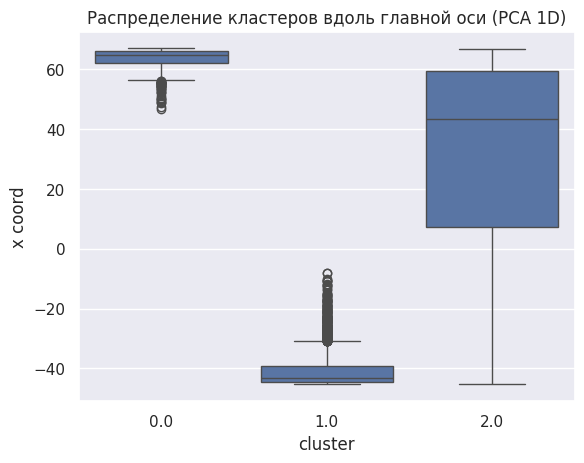

In [57]:
box_np = np.vstack([np.hstack([i[0].reshape(-1, 1), i[1].reshape(-1, 1)]) for i in box_data])
box_df = pd.DataFrame({'x coord': box_np[:, 0], 'cluster': box_np[:, 1]})
sns.boxplot(box_df, x='cluster', y='x coord')
plt.title('Распределение кластеров вдоль главной оси (PCA 1D)')

# Вывод:
* Выборка разделима по количеству "полигонов" и их плотности. Более загроможденные картинки относятся к кластеру 0, далее идет кластер 1, затем наименее загроможденные картинки с номером кластера 2
* Заметно, что на более загроможденных картинках функция ошибки принимает значения бОльшие, чем на менее загроможденных картинках, что говорит о том, что симулятор умеет хорошо симулировать наименее загроможденные картинки и чуть хуже симулирует загроможденные